<a href="https://colab.research.google.com/github/antontx/notebooks/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import time
from typing import List
import pandas as pd
from IPython.display import display, HTML

### reading the data
_images: list of images in binary

_labels: array of bytestrings that represent the numbers $0-9$

- ```
b'\x03'
```
    - $b"[..]" →$ Bytestring
    - $\backslash x→$ escape sequence: following characters represent a __hexadecimal value__
    - $03→$ hexadecimal notation of $3$

In [6]:
training_images = "MNIST_dataset/train-images.idx3-ubyte"
training_labels = "MNIST_dataset/train-labels.idx1-ubyte" 
training_csv = "csv/training.csv"
TRAINING_SIZE = 60000

test_images = "MNIST_dataset/t10k-images.idx3-ubyte"
test_labels = "MNIST_dataset/t10k-labels.idx1-ubyte"
test_csv = "csv/testing.csv"
TEST_SIZE = 10000 

### converting the data & saving/ caching it into csv

In [10]:
def convert(labels, images, csvf, size):
  labelf = open(labels, "rb") #rb -> reading the file as binary
  imgf = open(images, "rb")
  csvf = open(csvf, "w")

  #start locations of the actual data
  labelf.read(8) 
  imgf.read(16)

  n = 28

  images = []
  for i in range(size):
    label = int.from_bytes(labelf.read(1),byteorder="big")

    pixels = np.zeros((n,n))
    for row in range(n):
      for column in range(n):
        pixels[row][column] = int.from_bytes(imgf.read(1),byteorder="big")
        
    
    images.append([label,pixels])
  
  # for image in images:
  #   image_string = ",".join(str(value) for value in image[1])
  #   csvf.write(f"{str(image[0])},{image_string}\n")

  labelf.close()
  imgf.close()
  csvf.close()

  return images
    


In [11]:
test_data = convert(test_labels, test_images,test_csv,TEST_SIZE)
training_data = convert(training_labels,training_images,training_csv,TRAINING_SIZE)

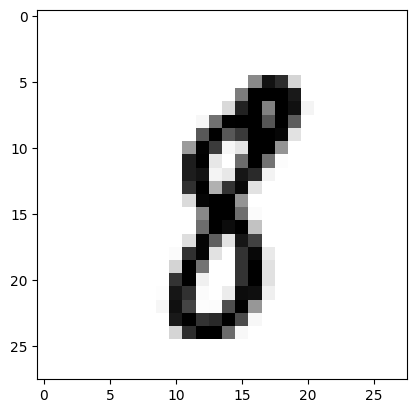

In [12]:
plt.imshow(training_data[300][1], cmap="Greys",interpolation="None")